### Author: AmirPourmand
### Student No: 99210259

### Required imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Set your student number as random seed

In [2]:
np.random.seed(99210259)

### Possion process parameter (lambda) is 0.1 for all experiments except "Random Splitting" section and is stored in variable l.

In [3]:
l = 0.1

# Generate Poisson Process

1. Generate a poisson process with 100 samples.
2. Plot the points. 

In [26]:
def generate_poisson_process(l,sample_count=100):
    return np.cumsum(np.random.exponential(scale=1/l,size=(sample_count)))

In [10]:
np.set_printoptions(suppress=True)

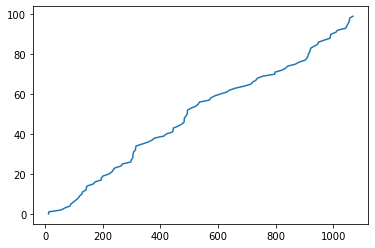

In [28]:
plt.plot(generate_poisson_process(l,100),np.arange(0,100))

# Distribution of number of samples in arbitrary intervals

### Expectation of number of samples

1. Generate a poission process consisting of 10000 samples.
2. Compute number of points in 1000 random intevals
3. Draw the graph of number of samples w.r.t. interval length
4. Conclude the relationship between expectation of number of samples and interval length.

Text(0, 0.5, 'Lenght of interval')

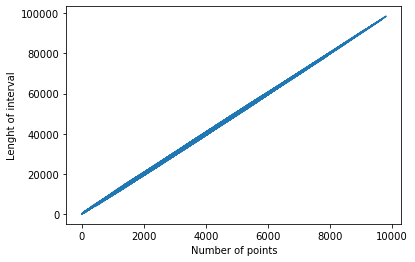

In [99]:
sample2=generate_poisson_process(l,10000)
max_time=sample2.max()

first = np.random.uniform(low=0,high=max_time,size=(1000))
second = np.random.uniform(low=0,high=max_time,size=(1000))

start_interval = np.minimum(first,second)
end_interval = np.maximum(first,second)

test= (start_interval[:,None]<=sample2)&(sample2<=end_interval[:,None])
number_of_points = np.sum(test,axis=1)
plt.plot(number_of_points,end_interval-start_interval)
plt.xlabel("Number of points")
plt.ylabel("Lenght of interval")

- There is complete linear relationship between the two. Meaning that number of events at an interval only depends on the length of that interval. It does not depend of anything else! 

### PDF of number samples 

In [132]:
sample3=generate_poisson_process(l,10000)

In [138]:
interval=np.arange(start=0,stop=sample3.max(),step=100)
count_of_events=np.sum((interval[:,None]<=sample3)&(sample3<=(interval[:,None]+100)),axis=1)
beta=np.average(count_of_events)
l_estimated = 1/beta

1. Generate a poission process consisting of 10000 samples.
2. For each consecutive interval of length 100 compute the number of samples
3. Estimate the PDF
4. Compute the real PDF (possion distribution)
5. Compare estimated and real distributions in a single graph

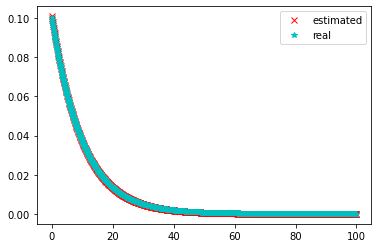

In [164]:
values=np.arange(0,100,step=0.1)
fig,ax= plt.subplots()
ax.plot(values,l_estimated*np.exp(-1*l_estimated*values),'rx',label='estimated')
ax.plot(values,l*np.exp(-1*l*values),'c*',label='real')
ax.legend()

# Expectation of the time of $i^{th}$ event.

1. Generate 1000 different poisson processes with 100 samples each.
2. Compute the average time of $i^{th}$ event for $1 \leq i \leq 100$
3. Compare the estimations with true expectations

In [183]:
poisson_count =1000
sample_count=100
samples=np.cumsum(np.random.exponential(scale=1/l,size=(poisson_count,sample_count)),axis=1)
print('estimation: ', np.average(np.diff(samples)))
print('expectation: ',1/l)

estimation:  10.02776946417949
expectation:  10.0


# Random Splitting

1. Load Poission process from poisson_sample.npy (consists of time of events).
2. Estimate the parameter of the process.
3. Generate Poisson processes with parameter=0.2, 1, 5 with random splitting. (with the same number of events as the given process)
4. Plot the genereted processes and store them as possion_{parameter_value}.npy.

In [4]:
sample=np.load('poisson_sample.npy')
avg_time= np.average(np.diff(sample))
l_estimated = 1/avg_time
print(l_estimated)

12.705557209552078


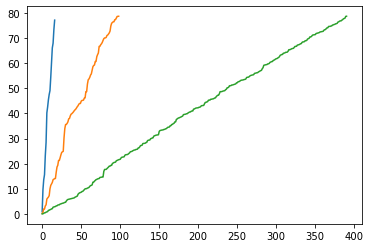

In [11]:
def split_poisson_process(parameter):
    probability = parameter/l_estimated
    mask=np.random.uniform(size=sample.shape) < probability
    selected_items=sample[mask]
    plt.plot(np.arange(selected_items.shape[0]),selected_items)
    np.save(f'possion_{parameter}.npy',selected_items)
    
split_poisson_process(0.2)
split_poisson_process(1)
split_poisson_process(5)